In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

In [81]:
# Parameters
d = 5                  # Support for uniform distribution: [-d, d]
sigma = 2.0            # Standard deviation for discrete Gaussian
Z_range = np.arange(-4*d, 4*d + 1)  # Support for plotting the discrete Gaussian

In [82]:
# Uniform distribution on [-d, d]
uniform_support = np.arange(-d, d+1)
uniform_prob = np.ones_like(uniform_support, dtype=float) / len(uniform_support)

In [83]:
# Discrete Gaussian on Z with std deviation sigma
gaussian_unnormalized = np.exp(- (Z_range ** 2) / (2 * sigma ** 2))
gaussian_prob = gaussian_unnormalized / np.sum(gaussian_unnormalized)  # Normalize

In [84]:
# Plotting
plt.figure(figsize=(10, 6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

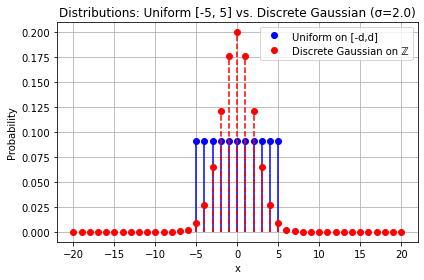

In [85]:
# Uniform distribution
plt.stem(uniform_support, uniform_prob, linefmt='b-', markerfmt='bo', basefmt=" ", label='Uniform on [-d,d]')

# Discrete Gaussian
plt.stem(Z_range, gaussian_prob, linefmt='r--', markerfmt='ro', basefmt=" ", label='Discrete Gaussian on ℤ')

plt.title(f'Distributions: Uniform [-{d}, {d}] vs. Discrete Gaussian (σ={sigma})')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

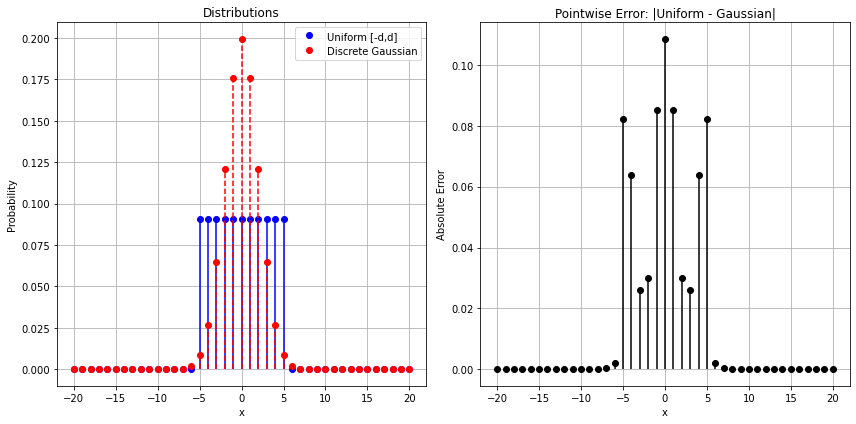

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
d = 5
sigma = 2.0
Z_range = np.arange(-4*d, 4*d + 1)  # Extended range for Gaussian

# Uniform distribution on [-d, d]
uniform_prob = np.zeros_like(Z_range, dtype=float)
mask = (Z_range >= -d) & (Z_range <= d)
uniform_prob[mask] = 1.0 / (2 * d + 1)

# Discrete Gaussian on Z
gaussian_unnormalized = np.exp(- (Z_range ** 2) / (2 * sigma ** 2))
gaussian_prob = gaussian_unnormalized / np.sum(gaussian_unnormalized)

# Error function (pointwise absolute difference)
error = np.abs(uniform_prob - gaussian_prob)

# Plot the distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.stem(Z_range, uniform_prob, linefmt='b-', markerfmt='bo', basefmt=" ", label='Uniform [-d,d]')
plt.stem(Z_range, gaussian_prob, linefmt='r--', markerfmt='ro', basefmt=" ", label='Discrete Gaussian')
plt.title('Distributions')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)

# Plot the error function
plt.subplot(1, 2, 2)
plt.stem(Z_range, error, linefmt='k-', markerfmt='ko', basefmt=" ")
plt.title('Pointwise Error: |Uniform - Gaussian|')
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.grid(True)

plt.tight_layout()
plt.show()


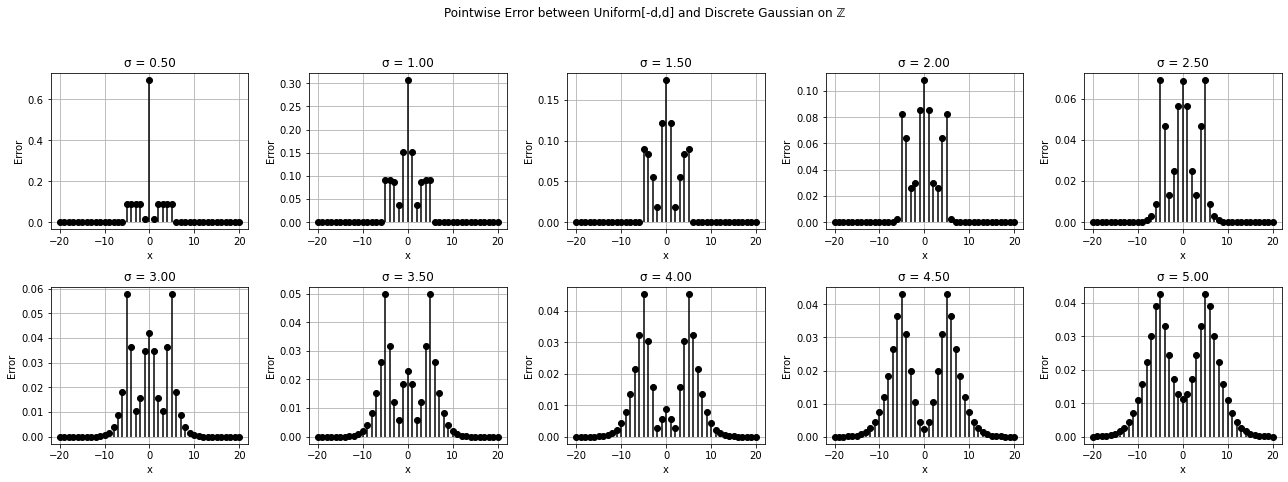

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Fixed parameters
d = 5
Z_range = np.arange(-4*d, 4*d + 1)  # Support for plotting
uniform_prob = np.zeros_like(Z_range, dtype=float)
mask = (Z_range >= -d) & (Z_range <= d)
uniform_prob[mask] = 1.0 / (2 * d + 1)

# Define 10 different standard deviations
sigmas = np.linspace(0.5, 5.0, 10)

# Plotting setup
fig, axes = plt.subplots(2, 5, figsize=(18, 7))
fig.suptitle('Pointwise Error between Uniform[-d,d] and Discrete Gaussian on ℤ')

for i, sigma in enumerate(sigmas):
    # Compute discrete Gaussian
    gaussian_unnormalized = np.exp(- (Z_range ** 2) / (2 * sigma ** 2))
    gaussian_prob = gaussian_unnormalized / np.sum(gaussian_unnormalized)

    # Compute error
    error = np.abs(uniform_prob - gaussian_prob)

    # Plot on subplot
    ax = axes[i // 5, i % 5]
    ax.stem(Z_range, error, linefmt='k-', markerfmt='ko', basefmt=" ")
    ax.set_title(f'σ = {sigma:.2f}')
    ax.set_xlabel('x')
    ax.set_ylabel('Error')
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


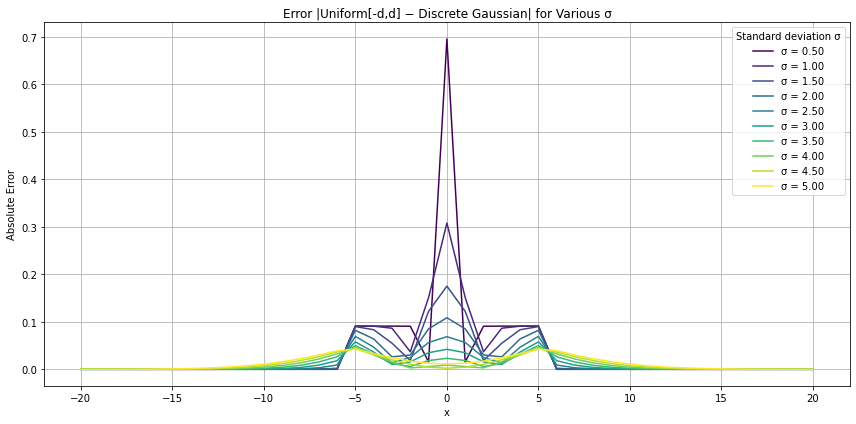

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
d = 5
Z_range = np.arange(-4*d, 4*d + 1)
uniform_prob = np.zeros_like(Z_range, dtype=float)
mask = (Z_range >= -d) & (Z_range <= d)
uniform_prob[mask] = 1.0 / (2 * d + 1)

# Define 10 standard deviations
sigmas = np.linspace(0.5, 5.0, 10)
colors = plt.cm.viridis(np.linspace(0, 1, len(sigmas)))  # distinct colors

# Plot setup
plt.figure(figsize=(12, 6))
for i, sigma in enumerate(sigmas):
    # Discrete Gaussian
    gaussian_unnormalized = np.exp(- (Z_range ** 2) / (2 * sigma ** 2))
    gaussian_prob = gaussian_unnormalized / np.sum(gaussian_unnormalized)

    # Error function
    error = np.abs(uniform_prob - gaussian_prob)

    # Plot
    plt.plot(Z_range, error, label=f'σ = {sigma:.2f}', color=colors[i])

# Final touches
plt.title('Error |Uniform[-d,d] − Discrete Gaussian| for Various σ')
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.legend(title='Standard deviation σ')
plt.grid(True)
plt.tight_layout()
plt.show()


The standard deviation of uniform distribution in [-4,4] is:1.4907119849998598
Minimum statistical distance 0.2593174195185479 for sigma 4.0


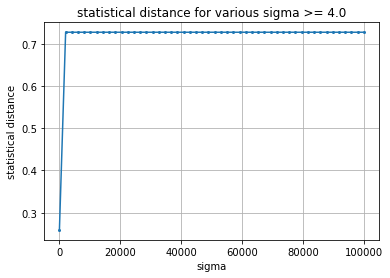

In [119]:
epsilon = 0.05
max_sigma = 10**5
d = 4

Z_range = np.arange(-4*d, 4*d + 1)
    
# Uniform distribution on [-d, d]
uniform_prob = np.zeros_like(Z_range, dtype=float)
mask = (Z_range >= -d) & (Z_range <= d)
uniform_prob[mask] = 1.0 / (2 * d + 1)
print(f"The standard deviation of uniform distribution in [{-d},{d}] is:{math.sqrt(d**2 + d)/3}")

# Try sigma values from a fine grid
sigmas = np.linspace(float(d), max_sigma, 50)


Sdistance = []    
for sigma in sigmas:
    gaussian_unnormalized = np.exp(- (Z_range ** 2) / (2 * sigma ** 2))
    gaussian_prob = gaussian_unnormalized / np.sum(gaussian_unnormalized)

    # Total variation distance
    error = np.abs(uniform_prob - gaussian_prob)
    tvd = 0.5 * np.sum(error)
    Sdistance.append(tvd)
    if tvd < epsilon:
        print(f"Optimal σ such that TVD < {epsilon}: {sigma}")  # Found smallest satisfying σ
        break
        

print(f"Minimum statistical distance {min(Sdistance)} for sigma {sigmas[Sdistance.index(min(Sdistance))]}")
        
plt.plot(sigmas,np.array(Sdistance),marker='o', markersize= 2)
plt.xlabel("sigma")
plt.ylabel("statistical distance")
plt.title(f"statistical distance for various sigma >= {float(d)}")
plt.grid(True)
plt.show()

The standard deviation of uniform distribution in [-4,4] is:1.4907119849998598
Minimum statistical distance 0.18236218574635477 for sigma 2.857142857142857


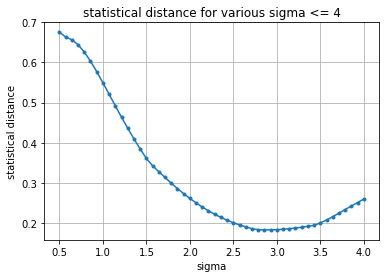

In [120]:
epsilon = 0.05
d = 4
max_sigma = d

Z_range = np.arange(-4*d, 4*d + 1)
    
# Uniform distribution on [-d, d]
uniform_prob = np.zeros_like(Z_range, dtype=float)
mask = (Z_range >= -d) & (Z_range <= d)
uniform_prob[mask] = 1.0 / (2 * d + 1)
print(f"The standard deviation of uniform distribution in [{-d},{d}] is:{math.sqrt(d**2 + d)/3}")


# Try sigma values from a fine grid
sigmas = np.linspace(0.5, max_sigma, 50)


Sdistance = []    
for sigma in sigmas:
    gaussian_unnormalized = np.exp(- (Z_range ** 2) / (2 * sigma ** 2))
    gaussian_prob = gaussian_unnormalized / np.sum(gaussian_unnormalized)

    # Total variation distance
    error = np.abs(uniform_prob - gaussian_prob)
    tvd = 0.5 * np.sum(error)
    Sdistance.append(tvd)
    if tvd < epsilon:
        print(f"Optimal σ such that TVD < {epsilon}: {sigma}")  # Found smallest satisfying σ
        break

print(f"Minimum statistical distance {min(Sdistance)} for sigma {sigmas[Sdistance.index(min(Sdistance))]}")
        
plt.plot(sigmas,np.array(Sdistance),marker='o',markersize= 3)
plt.xlabel("sigma")
plt.ylabel("statistical distance")
plt.title(f"statistical distance for various sigma <= {max_sigma}")
plt.grid(True)
plt.show()